In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Import citipy
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.

len(cities)

648

In [5]:
#Import the dependencies
import requests
# Import API key
from config import weather_api_key

In [6]:
# Build basic URL with API key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the datetime module from the datetime library
from datetime import datetime

In [8]:
#Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval.    ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all of the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create an endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities
    try:  
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval.    
-----------------------------
Processing Record 1 of Set 1 | mogzon
Processing Record 2 of Set 1 | mersing
Processing Record 3 of Set 1 | uglovskoye
Processing Record 4 of Set 1 | namibe
Processing Record 5 of Set 1 | yar-sale
Processing Record 6 of Set 1 | cabo san lucas
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | meiganga
Processing Record 10 of Set 1 | roald
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | peniche
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | abha
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | verkhoyansk
Processing Record 18 of Set 1 | erzin
Processing Record 19 of Set 1 | stornoway
Processing Record 20 of Set 1 | cap malheureux
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | dikson
Processing Rec

In [9]:
len(city_data)

598

In [10]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mogzon,51.7435,111.9606,63.50,96,100,0.47,RU,2021-07-22 02:02:15
1,Mersing,2.4312,103.8405,84.94,71,94,8.66,MY,2021-07-22 02:02:15
2,Uglovskoye,51.3557,80.1942,71.49,57,21,11.86,RU,2021-07-22 02:02:16
3,Namibe,-15.1961,12.1522,64.33,81,0,3.98,AO,2021-07-22 02:02:07
4,Yar-Sale,66.8333,70.8333,59.41,73,5,10.71,RU,2021-07-22 02:02:16
5,Cabo San Lucas,22.8909,-109.9124,93.51,66,0,10.74,MX,2021-07-22 02:02:16
6,Ushuaia,-54.8000,-68.3000,34.16,92,100,7.83,AR,2021-07-22 02:01:42
7,Thompson,55.7435,-97.8558,69.96,64,90,5.75,CA,2021-07-22 01:59:18
8,Meiganga,6.5167,14.3000,64.80,95,100,3.11,CM,2021-07-22 02:02:17
9,Roald,62.5833,6.1333,56.34,88,90,16.11,NO,2021-07-22 02:02:02


In [11]:
# Reorder columns of DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mogzon,RU,2021-07-22 02:02:15,51.7435,111.9606,63.50,96,100,0.47
1,Mersing,MY,2021-07-22 02:02:15,2.4312,103.8405,84.94,71,94,8.66
2,Uglovskoye,RU,2021-07-22 02:02:16,51.3557,80.1942,71.49,57,21,11.86
3,Namibe,AO,2021-07-22 02:02:07,-15.1961,12.1522,64.33,81,0,3.98
4,Yar-Sale,RU,2021-07-22 02:02:16,66.8333,70.8333,59.41,73,5,10.71
5,Cabo San Lucas,MX,2021-07-22 02:02:16,22.8909,-109.9124,93.51,66,0,10.74
6,Ushuaia,AR,2021-07-22 02:01:42,-54.8000,-68.3000,34.16,92,100,7.83
7,Thompson,CA,2021-07-22 01:59:18,55.7435,-97.8558,69.96,64,90,5.75
8,Meiganga,CM,2021-07-22 02:02:17,6.5167,14.3000,64.80,95,100,3.11
9,Roald,NO,2021-07-22 02:02:02,62.5833,6.1333,56.34,88,90,16.11


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV file
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

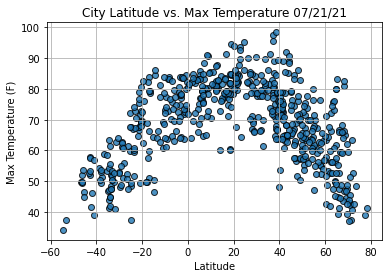

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

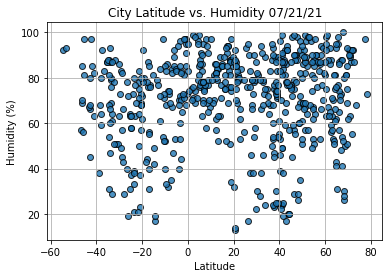

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

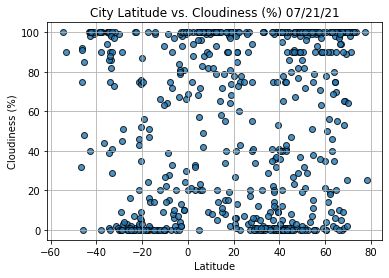

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig3.png")
#Show plot
plt.show()

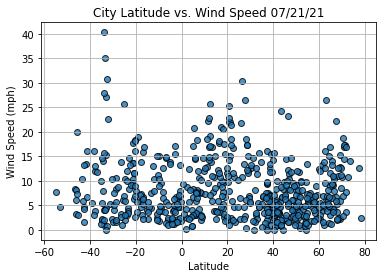

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            wind_speed,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig4.png")
#Show plot
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_liner_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<=0)]

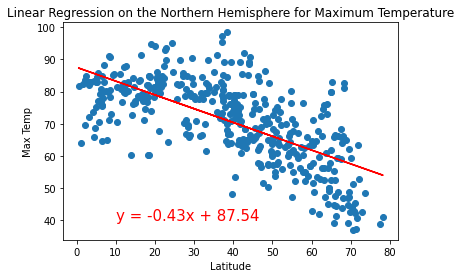

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_liner_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10,40))

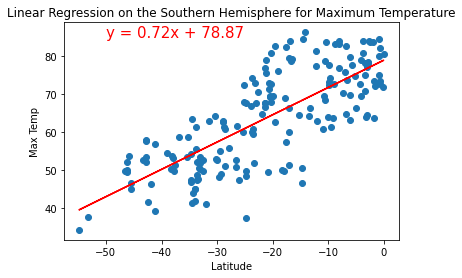

In [21]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_liner_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-50,85))

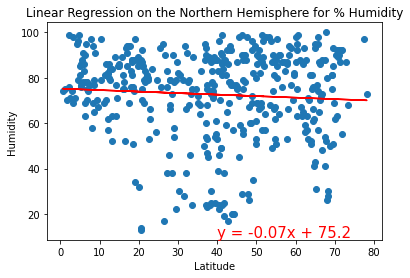

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_liner_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Humidity', 'Humidity', (40,10))

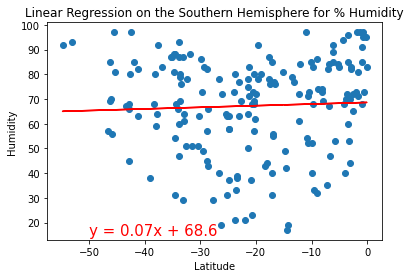

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function
plot_liner_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Humidity', 'Humidity', (-50,15))

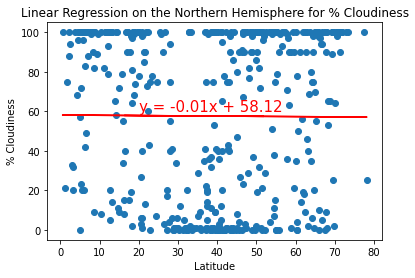

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_liner_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (20,60))

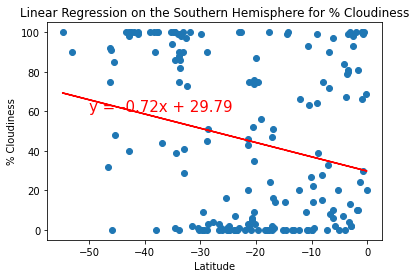

In [34]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_liner_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-50,60))

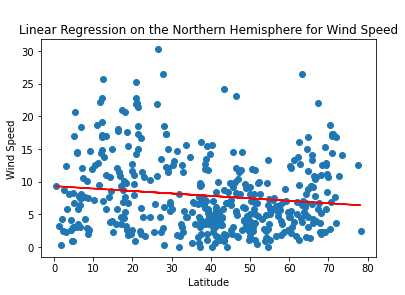

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_liner_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed', (40,35))

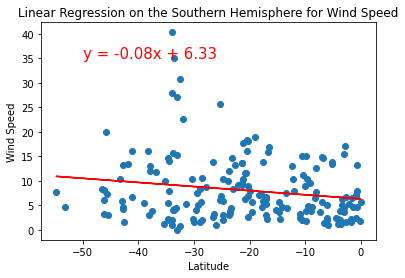

In [44]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_liner_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed', (-50,35))